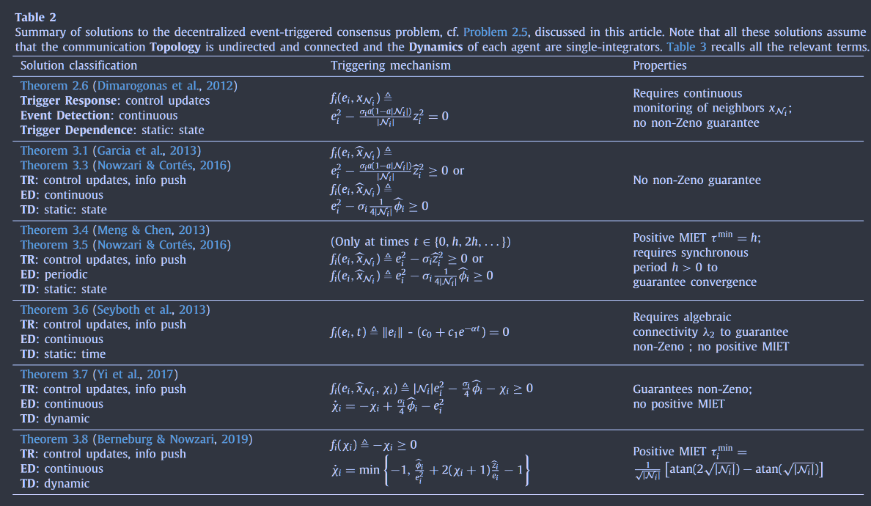

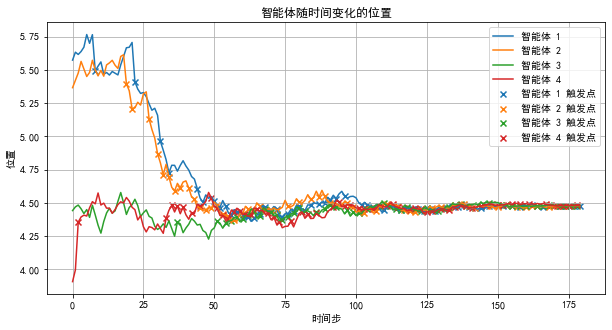

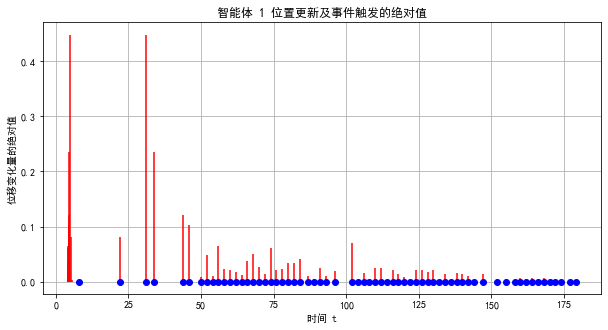

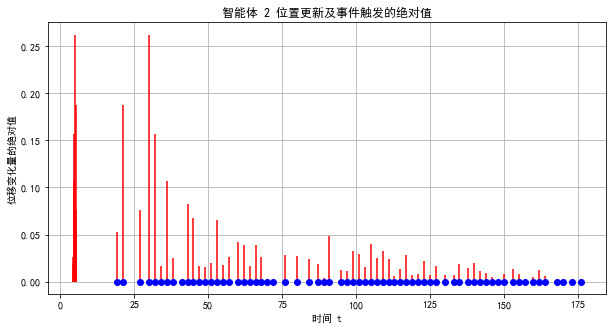

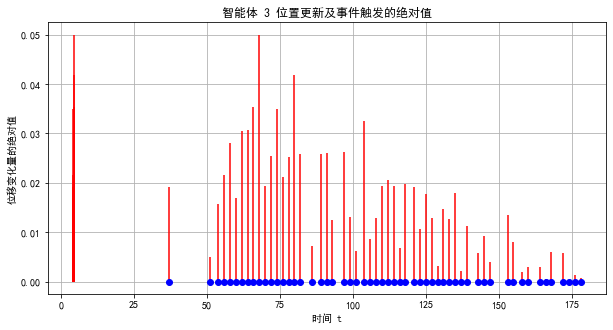

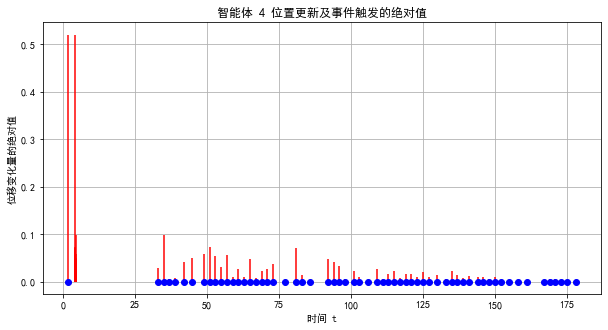

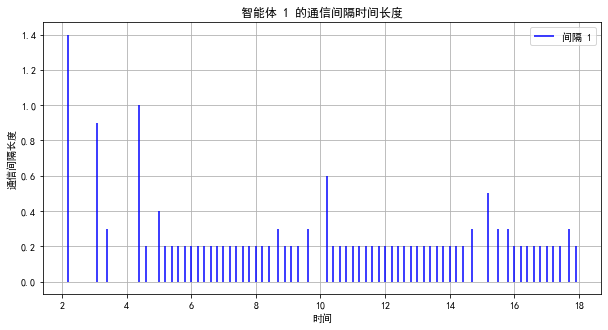

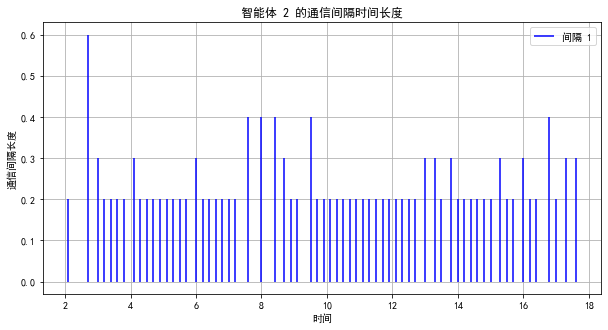

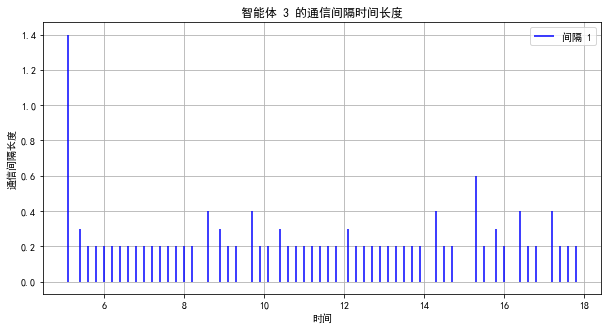

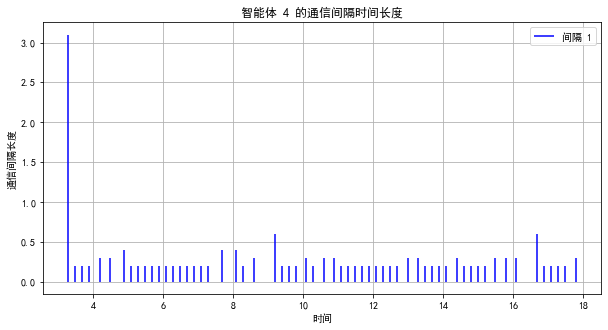

In [22]:
#Trigger response
#Theorem 2.6

import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, initial_position, index):
        self.position = initial_position
        self.index = index
        self.neighbors = []
        self.last_broadcast_position = self.position  #存储了该智能体最近一次广播的位置
        self.sigma = np.random.uniform(0, 1)
        self.alpha = np.random.uniform(0, 1 / max(1, len(self.neighbors)))  # 另一个触发函数参数
        self.trigger_points = []
        self.trigger_points2 = []  # 用于记录事件触发时的位置
        self.delta_positions = []
        self.communication_times = []  # 记录每次通信的时间
        
    def add_neighbor(self, neighbor):
        if neighbor not in self.neighbors:
            self.neighbors.append(neighbor)
            neighbor.neighbors.append(self)

    def is_neighbor(self, agent):
        return agent in self.neighbors
    
    def get_position(self):
        return self.position
        
    def update_position(self, t, dt, num_iterations):
        self.alpha = np.random.uniform(0, 1 / max(1, len(self.neighbors)))
        e_i = self.last_broadcast_position - self.position
        z_i = sum(self.is_neighbor(neighbor) * (self.position - neighbor.get_position()) for neighbor in self.neighbors)  
        trigger_condition = e_i ** 2 - self.sigma * self.alpha * (1 - self.alpha * max(1, len(self.neighbors))) * z_i ** 2  / max(1, len(self.neighbors))
        
        # 如果事件触发函数大于等于0，则更新位置并广播新位置
        if trigger_condition >= 0:
            self.position -= z_i * dt
            #记录触发的相关信息
            self.delta_positions.append(self.last_broadcast_position - self.position)
            self.trigger_points2.append(t * dt)
            self.trigger_points.append((t, self.position))
            self.last_broadcast_position = self.position #更新位置
            self.communication_times.append(t * dt)
        else:
            self.position += np.random.uniform(-1, 1) * dt * ((num_iterations - t) / num_iterations)
            

# 初始化参数和智能体
num_agents = 4
num_iterations = 180
dt = 0.1
np.random.seed(0)
agents = [Agent(np.random.rand() * 10, i) for i in range(num_agents)]

# 定义邻居关系
agents[0].add_neighbor(agents[1])
agents[0].add_neighbor(agents[2])
agents[0].add_neighbor(agents[3])
agents[2].add_neighbor(agents[3])
agents[1].add_neighbor(agents[3])
agents[2].add_neighbor(agents[1])

# 运行模拟
positions = np.zeros((num_iterations, num_agents))
for t in range(num_iterations):
    for agent in agents:
        agent.update_position(t, dt, num_iterations)
        positions[t, agent.index] = agent.position


# 绘制结果图
plt.figure(figsize=(10, 5))
for i, agent in enumerate(agents):
    plt.plot(positions[:, i], label=f'智能体 {i+1}')
    # 绘制事件触发点
    if agent.trigger_points:
        trigger_times, trigger_positions = zip(*agent.trigger_points)
        plt.scatter(trigger_times, trigger_positions, marker='x', label=f'智能体 {i + 1} 触发点')
plt.xlabel('时间步')
plt.ylabel('位置')
plt.title('智能体随时间变化的位置')
plt.legend()
plt.grid(True)

for index, agent in enumerate(agents):
    plt.figure(figsize=(10, 5))
    for trigger_time, delta_position in zip(agent.trigger_points, agent.delta_positions):
        if delta_position != 0:
            absolute_delta = abs(delta_position)
            plt.vlines(trigger_time, 0, absolute_delta, colors='r')
            plt.plot(trigger_time[0], 0, 'bo')  
    plt.xlabel('时间 t')
    plt.ylabel('位移变化量的绝对值')
    plt.title(f'智能体 {index + 1} 位置更新及事件触发的绝对值')
    plt.grid(True)

for index, agent in enumerate(agents):
    if len(agent.communication_times) > 1:
        # 计算相邻两次通信的时间间隔
        intervals = np.diff(agent.communication_times)
        plt.figure(figsize=(10, 5))  # 为每个智能体创建一个新的图形
        for i, time in enumerate(agent.communication_times[1:]):
            # 在每次通信时间点上绘制一条垂直线，长度代表时间间隔
            plt.vlines(time, 0, intervals[i], label=f'间隔 {i+1}' if i == 0 else "", color='b')  # 仅在第一条线添加图例标签
        plt.xlabel('时间')
        plt.ylabel('通信间隔长度')
        plt.title(f'智能体 {index + 1} 的通信间隔时间长度')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号 '-' 显示为方块的问题

plt.show()

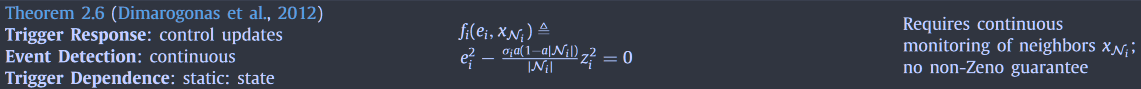

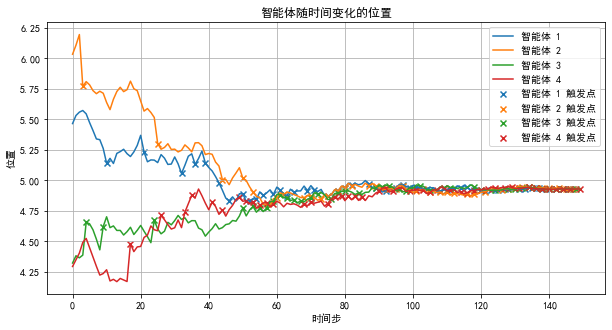

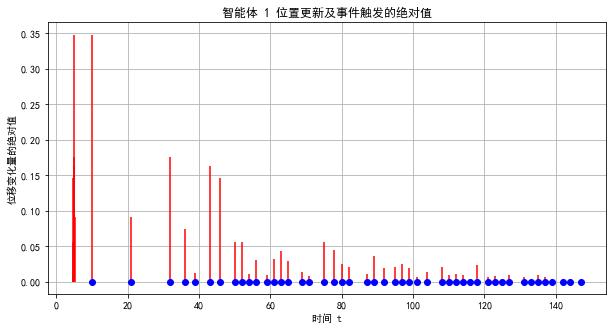

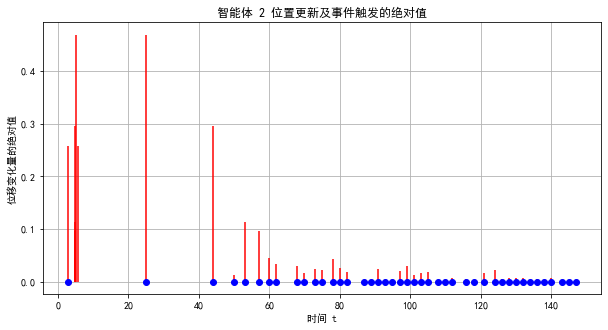

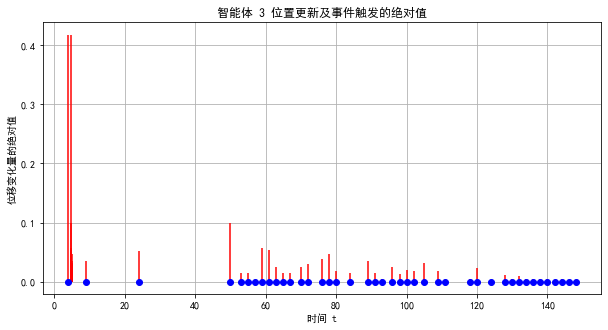

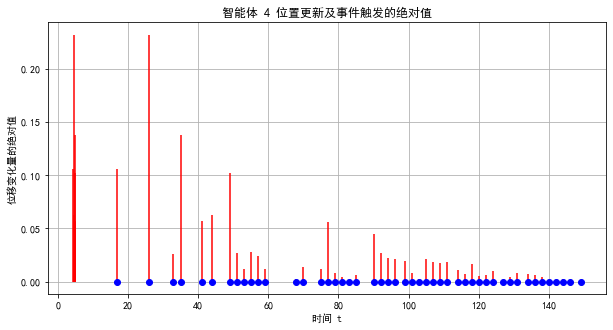

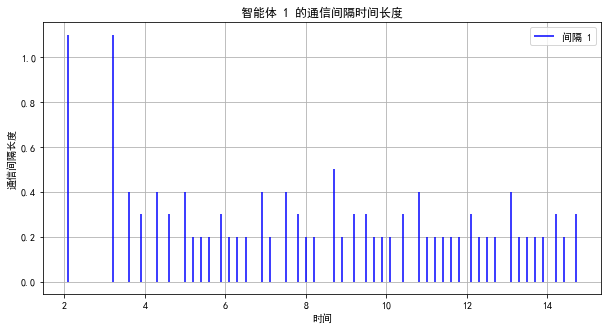

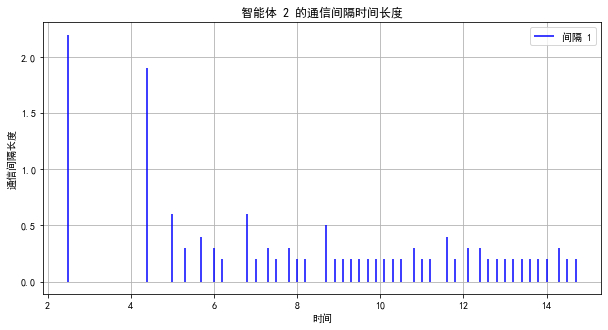

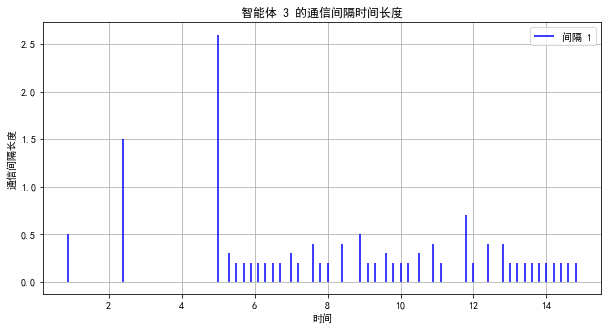

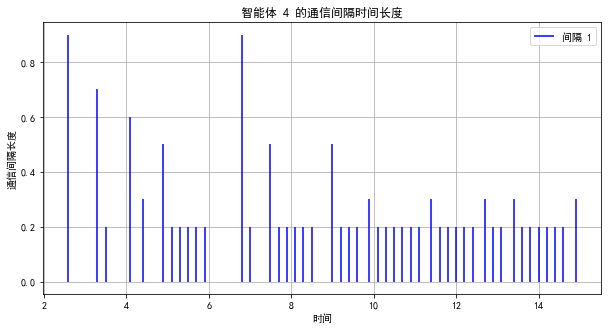

In [15]:
#Trigger response
#Theorem 3.3

import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, initial_position, index):
        self.position = initial_position
        self.index = index
        self.neighbors = []
        self.last_broadcast_position = self.position  #存储了该智能体最近一次广播的位置
        self.sigma = np.random.uniform(0, 1)
        self.trigger_points = []
        self.trigger_points2 = []  # 用于记录事件触发时的位置
        self.delta_positions = []
        self.communication_times = []  # 记录每次通信的时间

    def add_neighbor(self, neighbor):
        if neighbor not in self.neighbors:
            self.neighbors.append(neighbor)
            neighbor.neighbors.append(self)

    def is_neighbor(self, agent):
        return agent in self.neighbors
    
    def get_position(self):
        return self.position    
        
    def update_position(self, t, dt, num_iterations):
        self.sigma = np.random.uniform(0, 1)
        e_i = self.last_broadcast_position - self.position
        f_i = sum(self.is_neighbor(neighbor) * ((self.last_broadcast_position - neighbor.last_broadcast_position) ** 2) for neighbor in self.neighbors)
        z_i = sum(self.is_neighbor(neighbor) * (self.position - neighbor.get_position()) for neighbor in self.neighbors)
        trigger_condition = e_i ** 2 - self.sigma / (4 * max(1, len(self.neighbors))) * f_i
        
        # 如果事件触发函数大于等于0，则更新位置并广播新位置
        if trigger_condition >= 0:
            self.position -= z_i * dt
            #记录触发的相关信息
            self.delta_positions.append(self.last_broadcast_position - self.position)
            self.trigger_points2.append(t * dt)
            self.trigger_points.append((t, self.position))
            self.last_broadcast_position = self.position
            self.communication_times.append(t * dt)
        else:
            self.position += np.random.uniform(-1, 1) * dt * ((num_iterations - t) / num_iterations)

               

# 初始化参数和智能体
num_agents = 4
num_iterations = 150
dt = 0.1
np.random.seed(0)
agents = [Agent(np.random.rand() * 10, i) for i in range(num_agents)]

# 定义邻居关系
agents[0].add_neighbor(agents[1])
agents[0].add_neighbor(agents[2])
agents[0].add_neighbor(agents[3])
agents[2].add_neighbor(agents[3])
agents[1].add_neighbor(agents[3])
agents[2].add_neighbor(agents[1])


# 运行模拟
positions = np.zeros((num_iterations, num_agents))
for t in range(num_iterations):
    for agent in agents:
        agent.update_position(t, dt, num_iterations)
        positions[t, agent.index] = agent.position


# 绘制结果图
plt.figure(figsize=(10, 5))
for i, agent in enumerate(agents):
    plt.plot(positions[:, i], label=f'智能体 {i+1}')
    # 绘制事件触发点
    if agent.trigger_points:
        trigger_times, trigger_positions = zip(*agent.trigger_points)
        plt.scatter(trigger_times, trigger_positions, marker='x', label=f'智能体 {i + 1} 触发点')
plt.xlabel('时间步')
plt.ylabel('位置')
plt.title('智能体随时间变化的位置')
plt.legend()
plt.grid(True)

for index, agent in enumerate(agents):
    plt.figure(figsize=(10, 5))
    for trigger_time, delta_position in zip(agent.trigger_points, agent.delta_positions): 
        if delta_position != 0:
            absolute_delta = abs(delta_position)
            plt.vlines(trigger_time, 0, absolute_delta, colors='r')
            plt.plot(trigger_time[0], 0, 'bo')  
    plt.xlabel('时间 t')
    plt.ylabel('位移变化量的绝对值')
    plt.title(f'智能体 {index + 1} 位置更新及事件触发的绝对值')
    plt.grid(True)


for index, agent in enumerate(agents):
    if len(agent.communication_times) > 1:
        # 计算相邻两次通信的时间间隔
        intervals = np.diff(agent.communication_times)
        plt.figure(figsize=(10, 5))  # 为每个智能体创建一个新的图形
        for i, time in enumerate(agent.communication_times[1:]):
            # 在每次通信时间点上绘制一条垂直线，长度代表时间间隔
            plt.vlines(time, 0, intervals[i], label=f'间隔 {i+1}' if i == 0 else "", color='b')  # 仅在第一条线添加图例标签
        plt.xlabel('时间')
        plt.ylabel('通信间隔长度')
        plt.title(f'智能体 {index + 1} 的通信间隔时间长度')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号 '-' 显示为方块的问题

    plt.show()

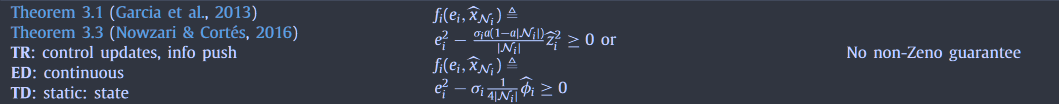  

--------
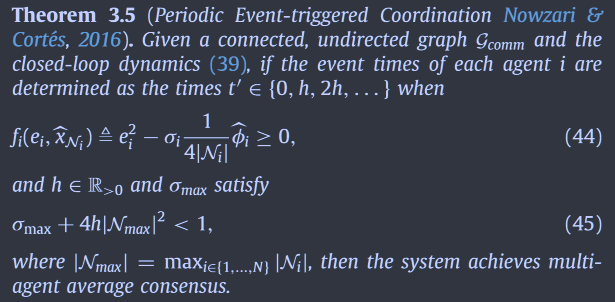

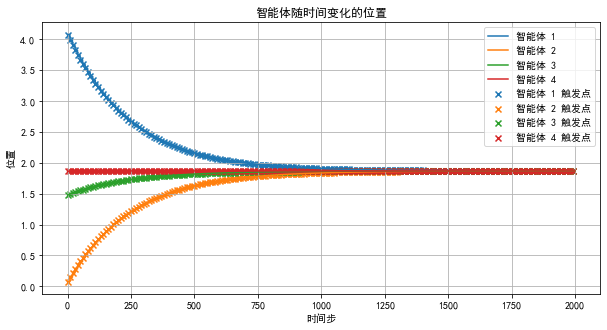

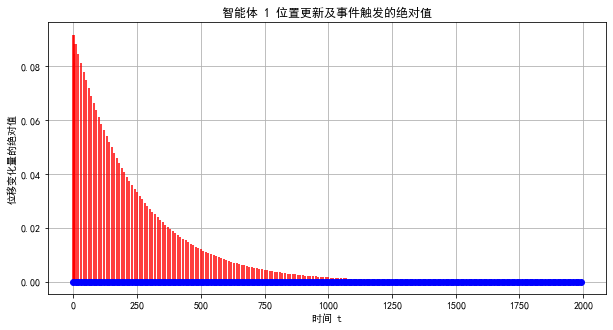

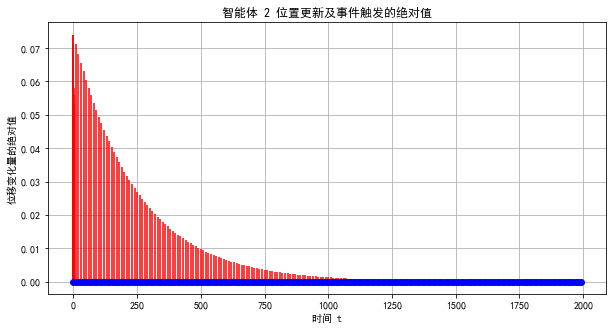

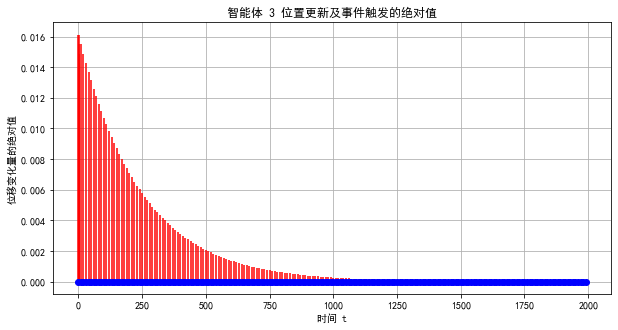

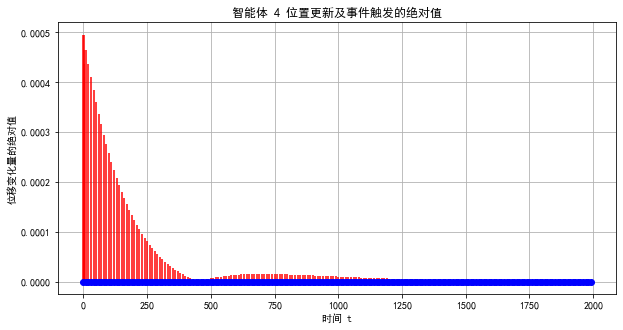

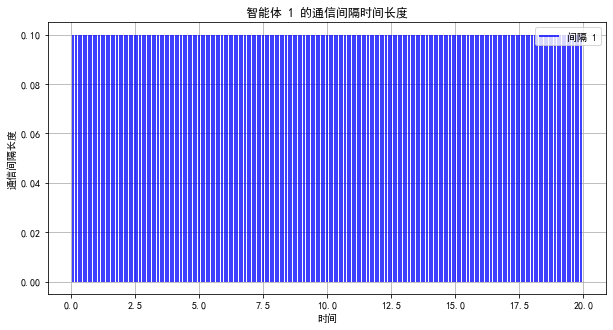

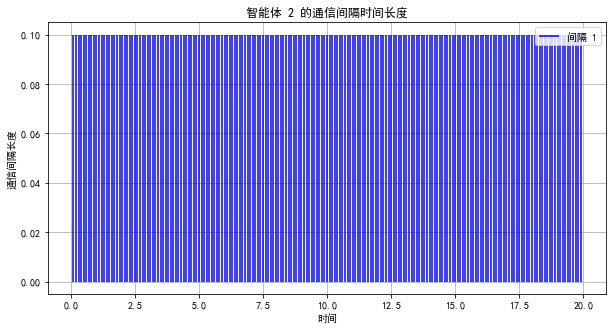

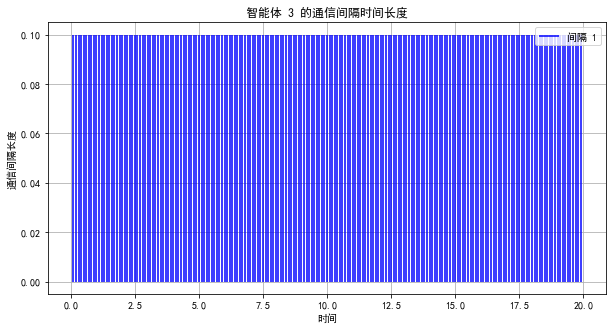

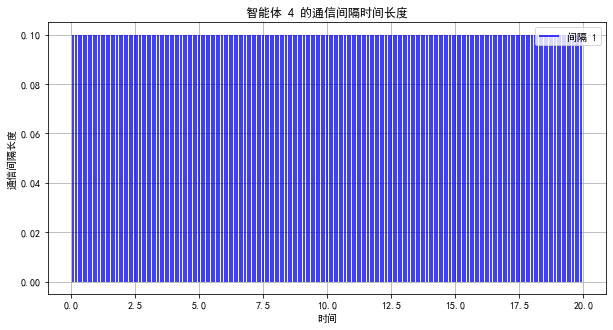

In [9]:
#Trigger response
#Theorem 3.5

import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, initial_position, index):
        self.position = initial_position
        self.index = index
        self.neighbors = []
        self.last_broadcast_position = self.position  #存储了该智能体最近一次广播的位置
        self.sigma = np.random.uniform(0, 1)
        self.trigger_points = []
        self.trigger_points2 = []  # 用于记录事件触发时的位置
        self.delta_positions = []
        self.communication_times = []  # 记录每次通信的时间
        self.MIET = 10  # 事件触发的周期性参数
        self.last_trigger_time = -self.MIET  # 初始化为-h以确保在t=0时触发

    def add_neighbor(self, neighbor):
        if neighbor not in self.neighbors:
            self.neighbors.append(neighbor)
            neighbor.neighbors.append(self)

    def is_neighbor(self, agent):
        return agent in self.neighbors
    
    def get_position(self):
        return self.position
        
    def update_position(self, t, dt, num_agents):
        N_max = num_agents -1
        self.sigma = np.random.uniform((1 -  4 * self.MIET * N_max ** 2) - 10, 1 -  4 * self.MIET * N_max ** 2)
        e_i = self.last_broadcast_position - self.position
        f_i = sum(self.is_neighbor(neighbor) * ((self.last_broadcast_position - neighbor.last_broadcast_position) ** 2) for neighbor in self.neighbors)
        z_i = sum(self.is_neighbor(neighbor) * (self.position - neighbor.get_position()) for neighbor in self.neighbors)
        trigger_condition = e_i ** 2 - self.sigma  / (4 * max(1, len(self.neighbors))) * f_i
        
        if (t - self.last_trigger_time >= self.MIET) and (trigger_condition >= 0): 
            # 如果事件触发函数大于等于0，则更新位置并广播新位置
            self.position -= z_i * dt
            #记录触发的相关信息
            self.delta_positions.append(self.last_broadcast_position - self.position)
            self.trigger_points2.append(t * dt)
            self.trigger_points.append((t, self.position))
            self.last_broadcast_position = self.position
            self.last_trigger_time = t
            self.communication_times.append(t * dt)
            

# 初始化参数和智能体
num_agents = 4
num_iterations = 2000
dt = 0.01
np.random.seed(1)
agents = [Agent(np.random.rand() * 10, i) for i in range(num_agents)]

# 定义邻居关系
agents[0].add_neighbor(agents[1])
agents[0].add_neighbor(agents[2])
agents[0].add_neighbor(agents[3])
agents[2].add_neighbor(agents[3])
agents[1].add_neighbor(agents[3])
agents[2].add_neighbor(agents[1])


# 运行模拟
positions = np.zeros((num_iterations, num_agents))
for t in range(num_iterations):
    current_average_position = np.mean([agent.position for agent in agents])
    for agent in agents:
        agent.update_position(t, dt, num_agents)
        positions[t, agent.index] = agent.position


# 绘制结果图
plt.figure(figsize=(10, 5))
for i, agent in enumerate(agents):
    plt.plot(positions[:, i], label=f'智能体 {i+1}')
    # 绘制事件触发点
    if agent.trigger_points:
        trigger_times, trigger_positions = zip(*agent.trigger_points)
        plt.scatter(trigger_times, trigger_positions, marker='x', label=f'智能体 {i + 1} 触发点')
plt.xlabel('时间步')
plt.ylabel('位置')
plt.title('智能体随时间变化的位置')
plt.legend()
plt.grid(True)


for index, agent in enumerate(agents):
    plt.figure(figsize=(10, 5))
    for trigger_time, delta_position in zip(agent.trigger_points, agent.delta_positions):
        if delta_position != 0:
            absolute_delta = abs(delta_position)
            plt.vlines(trigger_time, 0, absolute_delta, colors='r')
            plt.plot(trigger_time[0], 0, 'bo')  
    plt.xlabel('时间 t')
    plt.ylabel('位移变化量的绝对值')
    plt.title(f'智能体 {index + 1} 位置更新及事件触发的绝对值')
    plt.grid(True)


for index, agent in enumerate(agents):
    if len(agent.communication_times) > 1:
        # 计算相邻两次通信的时间间隔
        intervals = np.diff(agent.communication_times)
        plt.figure(figsize=(10, 5))  # 为每个智能体创建一个新的图形
        for i, time in enumerate(agent.communication_times[1:]):
            # 在每次通信时间点上绘制一条垂直线，长度代表时间间隔
            plt.vlines(time, 0, intervals[i], label=f'间隔 {i+1}' if i == 0 else "", color='b')  # 仅在第一条线添加图例标签
        plt.xlabel('时间')
        plt.ylabel('通信间隔长度')
        plt.title(f'智能体 {index + 1} 的通信间隔时间长度')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号 '-' 显示为方块的问题

plt.show()

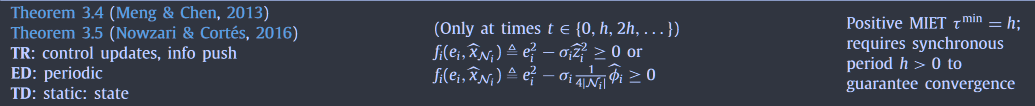

------------
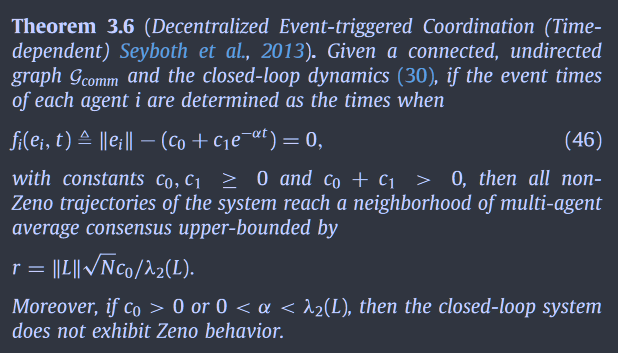


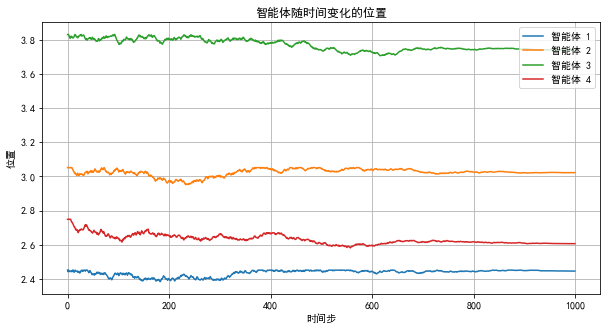

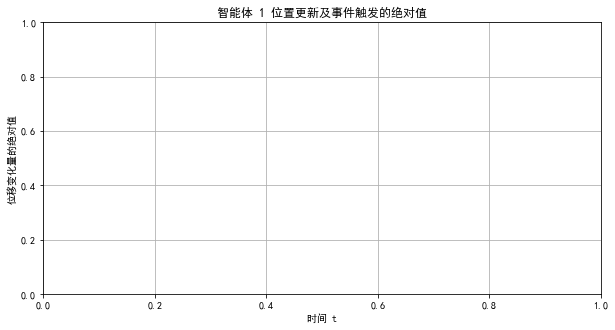

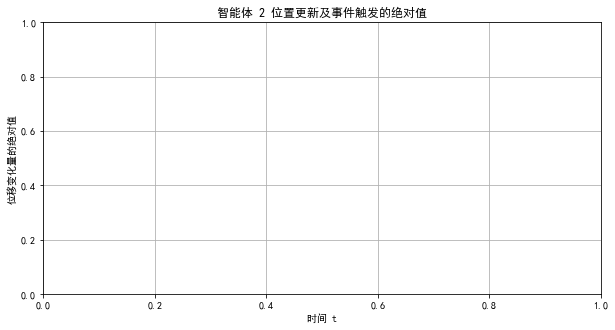

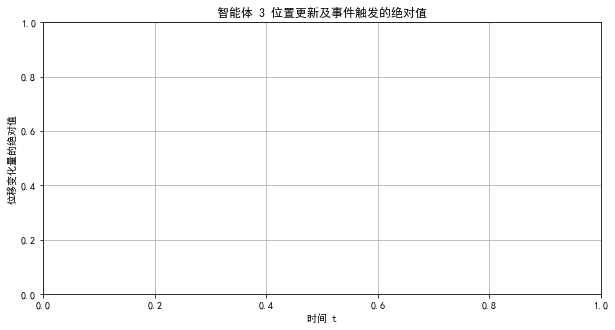

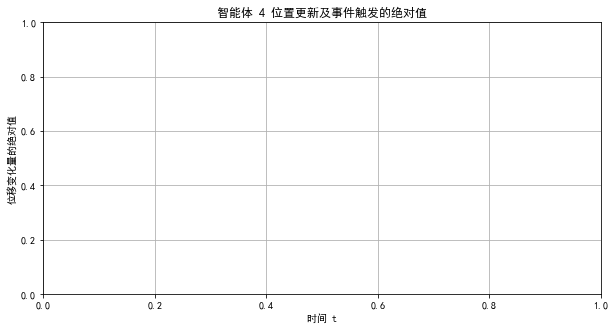

In [6]:
#Trigger response
#Theorem 3.6
#有问题！！！

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

'''拉普拉斯矩阵的谱范数：谱范数可以用来衡量图的稀疏性和连接性。一个图的拉普拉斯矩阵的谱范数越大，表示这个图的连接性越好，
它的节点间关联性越强。在聚类问题中，拉普拉斯矩阵的谱范数也常用于评估聚类的质量。

拉普拉斯矩阵的第二小特征值：第二小特征值通常被用来衡量图的连通性。如果一个图是连通的（即不存在孤立的子图），
那么它的第二小特征值会比较大。而如果一个图有多个孤立的子图，那么它的第二小特征值会较小。因此，第二小特征值可以用来度量图的分割情况，即图是否存在着明显的子结构。'''

class Agent:
    def __init__(self, initial_position, index):
        self.position = initial_position
        self.index = index
        self.neighbors = []
        self.last_broadcast_position = self.position  #存储了该智能体最近一次广播的位置
        self.sigma = np.random.uniform(0, 1)
        self.alpha = np.random.uniform(0, 1 / max(1, len(self.neighbors)))  # 另一个触发函数参数
        self.trigger_points = []
        self.trigger_points2 = []  # 用于记录事件触发时的位置
        self.delta_positions = []
        self.communication_times = []  # 记录每次通信的时间
        self.estimated_spectral_norm = 0
        self.estimated_lambda_2 = 1  # 给一个初始的估计值
        self.r = None  # r 的值将会根据其他值的更新而更新
        
    def add_neighbor(self, neighbor):
        if neighbor not in self.neighbors:
            self.neighbors.append(neighbor)
            neighbor.neighbors.append(self)

    def is_neighbor(self, agent):
        return agent in self.neighbors
    
    def get_position(self):
        return self.position
    
    def update_estimates(self, num_agents):
        """
        通过通信更新对于拉普拉斯矩阵谱范数和第二小特征值的估计
        """
        # 使用邻居的变化来估算 lambda_2
        local_degree = len(self.neighbors)
        local_variance = np.var([neighbor.get_position() for neighbor in self.neighbors])
        self.estimated_lambda_2 = max(self.estimated_lambda_2, local_variance * local_degree)

        # 使用网络中观察到的最大变化来估算谱范数
        max_neighbor_delta = max([distance.euclidean(self.position, neighbor.get_position()) for neighbor in self.neighbors])
        self.estimated_spectral_norm = max(self.estimated_spectral_norm, max_neighbor_delta)

        # 更新 r 的估计值
        c_0 = 1  # 此处为示例，实际应用时应根据网络特性进行调整
        self.r = self.estimated_spectral_norm * np.sqrt(num_agents * c_0) / self.estimated_lambda_2
    
    def update_position(self, t, dt, num_agents):
        c_0 = 1
        c_1 = 1
        alpha = 1
        e_i = self.last_broadcast_position - self.position
        z_bar_squared = sum(self.is_neighbor(neighbor) * (self.position - neighbor.get_position()) for neighbor in self.neighbors)
        trigger_condition = e_i - (c_0 + c_1 * np.exp(- alpha * t))
        
        # 如果事件触发函数大于等于0，则更新位置并广播新位置
        if trigger_condition == 0:
            self.position -= z_bar_squared * dt
            #记录触发的相关信息
            self.delta_positions.append(self.last_broadcast_position - self.position)
            self.trigger_points2.append(t * dt)
            self.trigger_points.append((t, self.position))
            self.last_broadcast_position = self.position
            self.last_trigger_time = t
            self.communication_times.append(t * dt)
        else:
            self.position += np.random.uniform(-1, 1) * dt * ((num_iterations - t) / num_iterations)
            #pass
            
        if t % 10 == 0:  # 每隔一定时间步，更新一次估计值
            self.update_estimates(num_agents)

        if self.r is not None and np.linalg.norm(self.position) > self.r:
            # 如果智能体超出了允许的范围，可以采取一些修正措施
            direction_vector = self.position / np.linalg.norm(self.position)
            self.position = direction_vector * self.r

                

# 初始化参数和智能体
num_agents = 4
num_iterations = 1000
dt = 0.01
np.random.seed(0)
agents = [Agent(np.random.rand() * 10, i) for i in range(num_agents)]

# 定义邻居关系
agents[0].add_neighbor(agents[1])
agents[0].add_neighbor(agents[2])
agents[0].add_neighbor(agents[3])
agents[2].add_neighbor(agents[3])
agents[1].add_neighbor(agents[3])
agents[2].add_neighbor(agents[1])

# 运行模拟
positions = np.zeros((num_iterations, num_agents))

for t in range(num_iterations):
    current_average_position = np.mean([agent.position for agent in agents])
    for agent in agents:
        agent.update_position(t, dt, num_agents)
        positions[t, agent.index] = agent.position

# 绘制结果图
plt.figure(figsize=(10, 5))
for i, agent in enumerate(agents):
    plt.plot(positions[:, i], label=f'智能体 {i+1}')
    # 绘制事件触发点
    if agent.trigger_points:
        trigger_times, trigger_positions = zip(*agent.trigger_points)
        plt.scatter(trigger_times, trigger_positions, marker='x', label=f'智能体 {i + 1} 触发点')

plt.xlabel('时间步')
plt.ylabel('位置')
plt.title('智能体随时间变化的位置')
plt.legend()
plt.grid(True)


for index, agent in enumerate(agents):
    plt.figure(figsize=(10, 5))
   
    for trigger_time, delta_position in zip(agent.trigger_points, agent.delta_positions):
        if delta_position != 0:
            absolute_delta = abs(delta_position)
            plt.vlines(trigger_time, 0, absolute_delta, colors='r')
            plt.plot(trigger_time[0], 0, 'bo')  

    plt.xlabel('时间 t')
    plt.ylabel('位移变化量的绝对值')
    plt.title(f'智能体 {index + 1} 位置更新及事件触发的绝对值')
    plt.grid(True)


for index, agent in enumerate(agents):
    if len(agent.communication_times) > 1:
        # 计算相邻两次通信的时间间隔
        intervals = np.diff(agent.communication_times)
        plt.figure(figsize=(10, 5))  # 为每个智能体创建一个新的图形
        for i, time in enumerate(agent.communication_times[1:]):
            # 在每次通信时间点上绘制一条垂直线，长度代表时间间隔
            plt.vlines(time, 0, intervals[i], label=f'间隔 {i+1}' if i == 0 else "", color='b')  # 仅在第一条线添加图例标签
        plt.xlabel('时间')
        plt.ylabel('通信间隔长度')
        plt.title(f'智能体 {index + 1} 的通信间隔时间长度')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号 '-' 显示为方块的问题

plt.show()

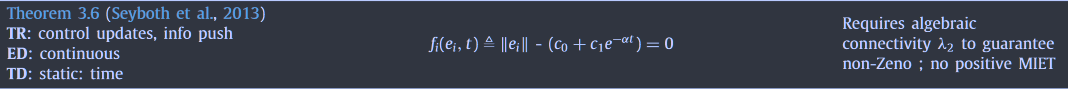

---------
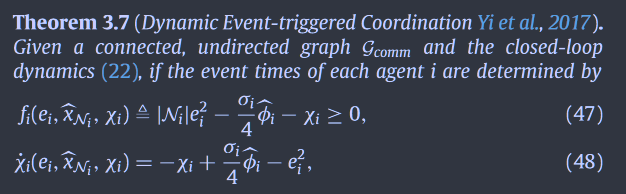  
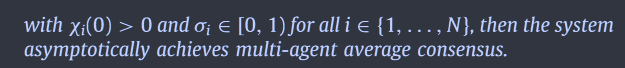

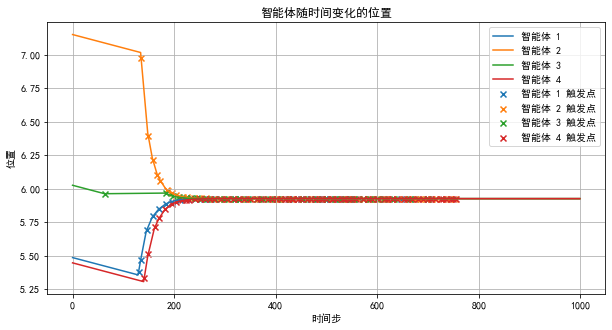

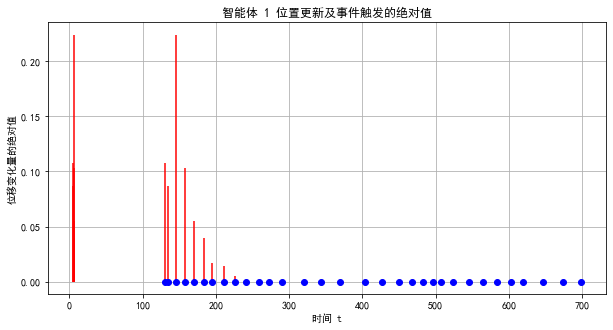

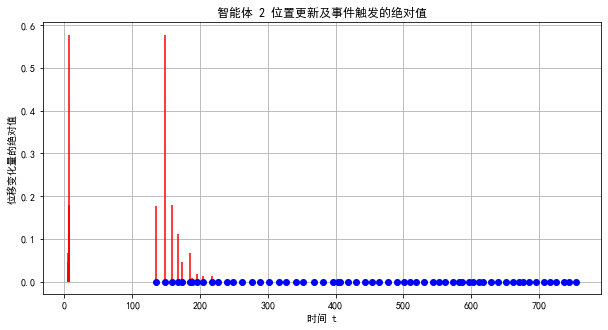

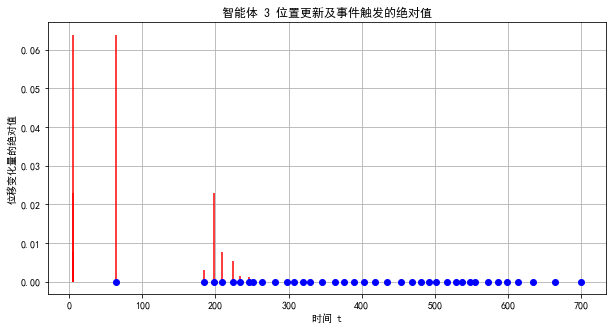

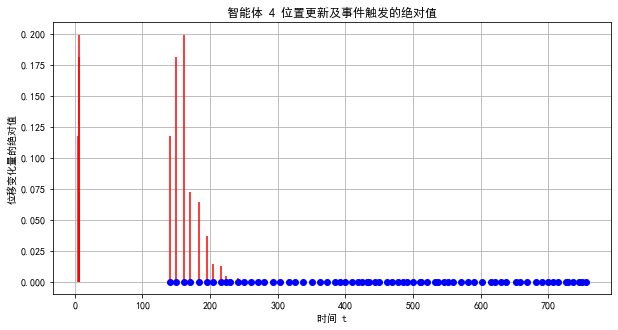

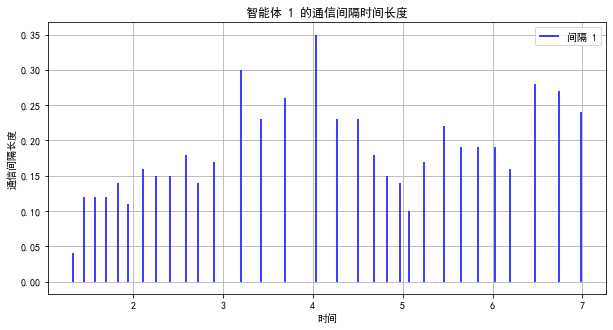

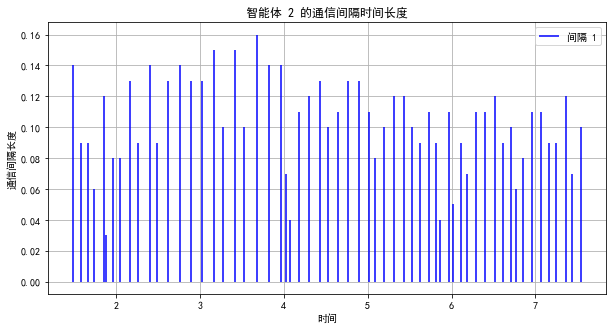

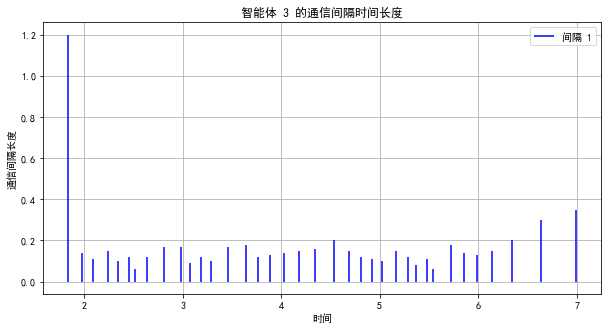

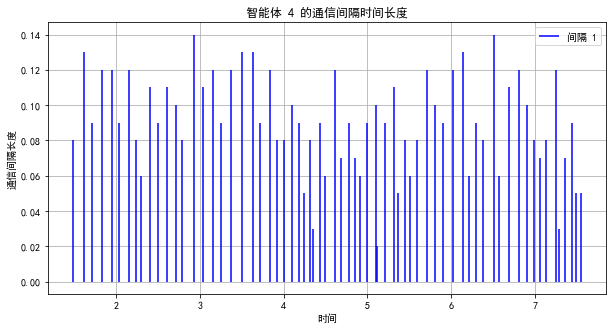

In [3]:
#Trigger response
#Theorem 3.7

import numpy as np
import matplotlib.pyplot as plt


class Agent:
    def __init__(self, initial_position, index):
        self.position = initial_position
        self.index = index
        self.neighbors = []
        self.last_broadcast_position = self.position  #存储了该智能体最近一次广播的位置
        self.trigger_points = []
        self.trigger_points2 = []  # 用于记录事件触发时的位置
        self.delta_positions = []
        self.communication_times = []  # 记录每次通信的时间
        self.z = 0.1
        
    def add_neighbor(self, neighbor):
        if neighbor not in self.neighbors:
            self.neighbors.append(neighbor)
            neighbor.neighbors.append(self)

    def is_neighbor(self, agent):
        return agent in self.neighbors
    
    def get_position(self):
        return self.position
    
    def event_trigger_function(self):
        e_i = self.last_broadcast_position - self.position
        phi_i = sum((self.last_broadcast_position - neighbor.last_broadcast_position) ** 2 for neighbor in self.neighbors)
        f_i_2 = self.sigma / 4 * phi_i + self.chi
        return len(self.neighbors) * e_i ** 2 - f_i_2  # 返回事件触发函数计算的两个部分
    
    def update_chi(self, dt):
        e_i = self.last_broadcast_position - self.position
        phi_i = sum((self.last_broadcast_position - neighbor.last_broadcast_position) ** 2 for neighbor in self.neighbors)
        self.chi += (-self.chi + self.sigma / 4 * phi_i - e_i ** 2) * dt
        return self.chi
        
    def update_position(self, t, dt):
        self.sigma = np.random.uniform(0, 1)
        x_i = self.position
        e_i = self.last_broadcast_position - self.position
        phi_i = sum(self.is_neighbor(neighbor) * (self.last_broadcast_position - neighbor.last_broadcast_position) ** 2 for neighbor in self.neighbors)
        x_update = -self.position + self.sigma / 4 * phi_i - e_i ** 2
        x_i += x_update
        z_bar_squared = sum(self.is_neighbor(neighbor) * (self.position - neighbor.get_position()) for neighbor in self.neighbors)
        trigger_condition = len(self.neighbors) * e_i ** 2 - self.sigma / 4 * phi_i - x_i
        
        # 如果事件触发函数大于等于0，则更新位置并广播新位置
        if trigger_condition >= 0:
            self.position -= z_bar_squared * dt
            #记录触发的相关信息
            self.delta_positions.append(self.last_broadcast_position - self.position)
            self.trigger_points2.append(t * dt)
            self.trigger_points.append((t, self.position))
            self.last_broadcast_position = self.position
            self.last_trigger_time = t
            self.communication_times.append(t * dt)
            self.z = z_bar_squared
        else:
            self.position -= self.z * dt
            
            

# 初始化参数和智能体
num_agents = 4
num_iterations = 1000
dt = 0.01
np.random.seed(0)
agents = [Agent(np.random.rand() * 10, i) for i in range(num_agents)]

# 定义邻居关系
agents[0].add_neighbor(agents[1])
agents[0].add_neighbor(agents[2])
agents[0].add_neighbor(agents[3])
agents[2].add_neighbor(agents[3])
agents[1].add_neighbor(agents[3])
agents[2].add_neighbor(agents[1])



# 运行模拟
positions = np.zeros((num_iterations, num_agents))
for t in range(num_iterations):
    current_average_position = np.mean([agent.position for agent in agents])
    for agent in agents:
        agent.update_position(t, dt)
        positions[t, agent.index] = agent.position

# 绘制结果图
plt.figure(figsize=(10, 5))
for i, agent in enumerate(agents):
    plt.plot(positions[:, i], label=f'智能体 {i+1}')
    # 绘制事件触发点
    if agent.trigger_points:
        trigger_times, trigger_positions = zip(*agent.trigger_points)
        plt.scatter(trigger_times, trigger_positions, marker='x', label=f'智能体 {i + 1} 触发点')
plt.xlabel('时间步')
plt.ylabel('位置')
plt.title('智能体随时间变化的位置')
plt.legend()
plt.grid(True)


for index, agent in enumerate(agents):
    plt.figure(figsize=(10, 5))
    for trigger_time, delta_position in zip(agent.trigger_points, agent.delta_positions):  
        if delta_position != 0:
            absolute_delta = abs(delta_position)
            plt.vlines(trigger_time, 0, absolute_delta, colors='r')
            plt.plot(trigger_time[0], 0, 'bo')  
    plt.xlabel('时间 t')
    plt.ylabel('位移变化量的绝对值')
    plt.title(f'智能体 {index + 1} 位置更新及事件触发的绝对值')
    plt.grid(True)


for index, agent in enumerate(agents):
    if len(agent.communication_times) > 1:
        # 计算相邻两次通信的时间间隔
        intervals = np.diff(agent.communication_times)
        plt.figure(figsize=(10, 5))  # 为每个智能体创建一个新的图形
        for i, time in enumerate(agent.communication_times[1:]):
            # 在每次通信时间点上绘制一条垂直线，长度代表时间间隔
            plt.vlines(time, 0, intervals[i], label=f'间隔 {i+1}' if i == 0 else "", color='b')  # 仅在第一条线添加图例标签
        plt.xlabel('时间')
        plt.ylabel('通信间隔长度')
        plt.title(f'智能体 {index + 1} 的通信间隔时间长度')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号 '-' 显示为方块的问题

    plt.show()

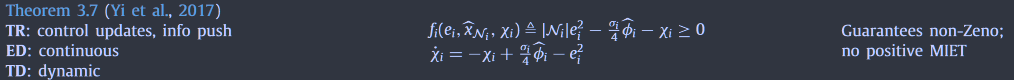

-----------
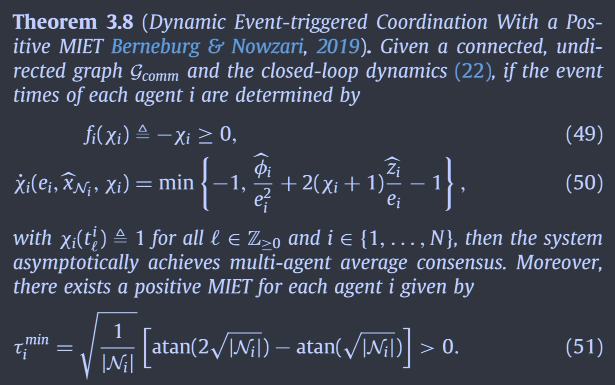

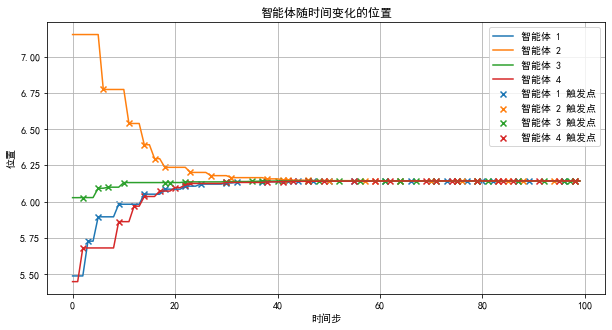

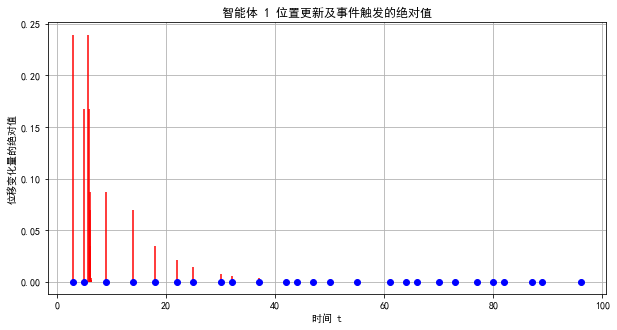

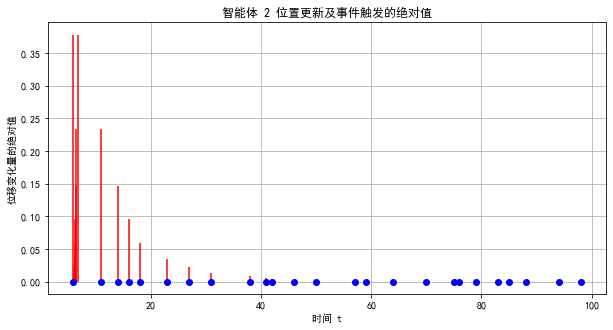

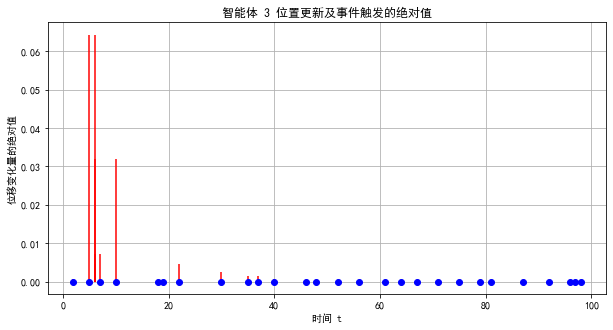

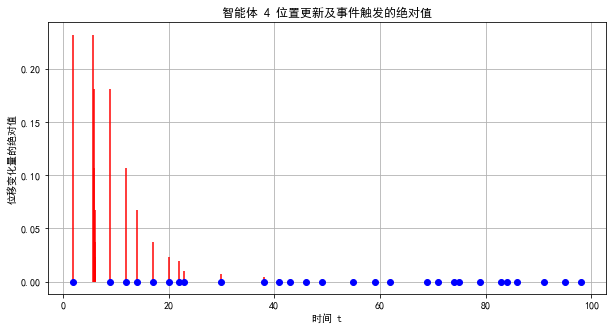

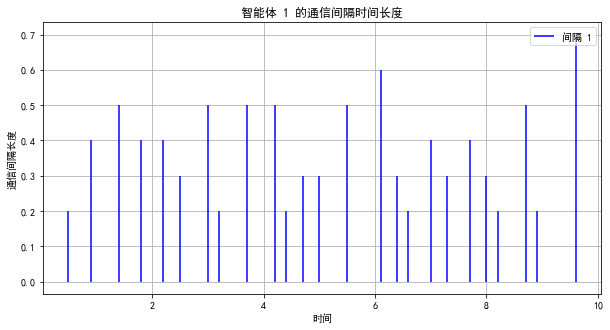

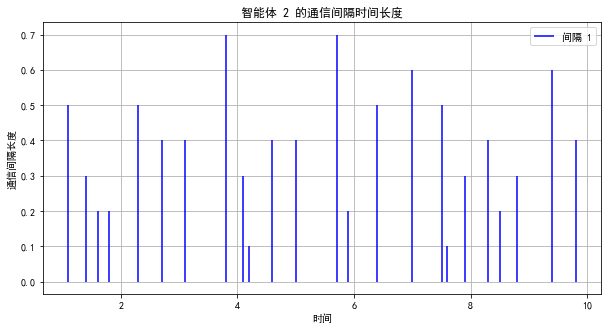

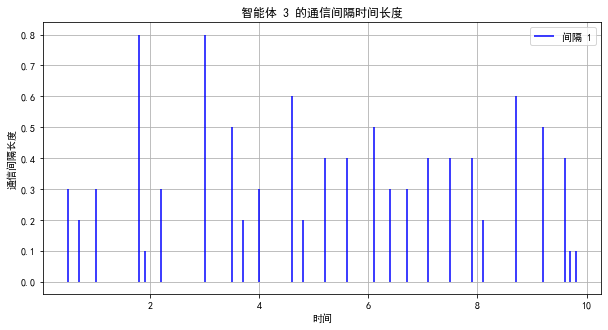

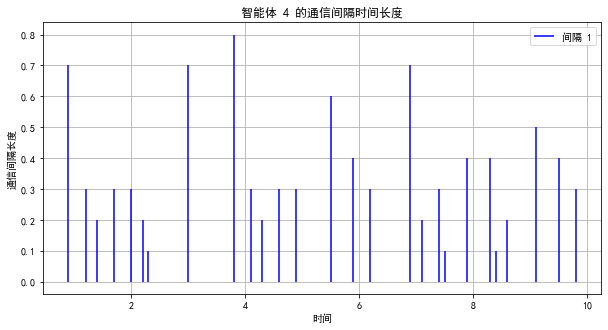

In [2]:
#Trigger response
#Theorem 3.8

import numpy as np
import matplotlib.pyplot as plt

class Agent:
    def __init__(self, initial_position, index):
        self.position = initial_position
        self.index = index
        self.neighbors = []
        self.last_broadcast_position = self.position  #存储了该智能体最近一次广播的位置
        self.trigger_points = []
        self.trigger_points2 = []  # 用于记录事件触发时的位置
        self.delta_positions = []
        self.last_trigger_time = 0  # 初始化上次触发时间
        self.MIET = 0  # 设定最小触发间隔，根据需求调整
        self.communication_times = []  # 记录每次通信的时间
        
    def add_neighbor(self, neighbor):
        if neighbor not in self.neighbors:
            self.neighbors.append(neighbor)
            neighbor.neighbors.append(self)

    def is_neighbor(self, agent):
        return agent in self.neighbors
    
    def get_position(self):
        return self.position
    
    def update_position(self, t, dt):
        N_i = max(1, len(self.neighbors))
        self.MIET = np.random.uniform((1 / np.sqrt(N_i)) * (np.arctan(2 * np.sqrt(N_i)) - np.arctan(np.sqrt(N_i))), 10)
        x_i = self.position
        e_i = max(1e-8, self.last_broadcast_position - self.position)
        phi_i = sum(self.is_neighbor(neighbor) * (self.last_broadcast_position - neighbor.last_broadcast_position) ** 2 for neighbor in self.neighbors)
        z_i = sum(self.is_neighbor(neighbor) * (self.last_broadcast_position - neighbor.last_broadcast_position) for neighbor in self.neighbors)
        z_bar_squared = sum(self.is_neighbor(neighbor) * (self.position - neighbor.get_position()) for neighbor in self.neighbors)
        x = phi_i / e_i ** 2 + 2 * (x_i + 1) * z_i / e_i -1
        x_update = min(-1, x)
        x_i == x_update 
        trigger_condition = - x_i
        
        if (t - self.last_trigger_time) >= self.MIET or (trigger_condition >= 0): 
            # 如果事件触发函数大于等于0，则更新位置并广播新位置
            self.position -= z_bar_squared * dt
            #记录触发的相关信息
            self.delta_positions.append(self.last_broadcast_position - self.position)
            self.trigger_points2.append(t * dt)
            self.trigger_points.append((t, self.position))
            self.last_broadcast_position = self.position
            self.last_trigger_time = t
            self.communication_times.append(t * dt)           

# 初始化参数和智能体
num_agents = 4
num_iterations = 100
dt = 0.1
np.random.seed(0)
agents = [Agent(np.random.rand() * 10, i) for i in range(num_agents)]

# 定义邻居关系
agents[0].add_neighbor(agents[1])
agents[0].add_neighbor(agents[2])
agents[0].add_neighbor(agents[3])
agents[2].add_neighbor(agents[3])
agents[1].add_neighbor(agents[3])
agents[2].add_neighbor(agents[1])



# 运行模拟
positions = np.zeros((num_iterations, num_agents))
for t in range(num_iterations):
    current_average_position = np.mean([agent.position for agent in agents])
    for agent in agents:
        agent.update_position(t, dt)
        positions[t, agent.index] = agent.position

# 绘制结果图
plt.figure(figsize=(10, 5))
for i, agent in enumerate(agents):
    plt.plot(positions[:, i], label=f'智能体 {i+1}')
    # 绘制事件触发点
    if agent.trigger_points:
        trigger_times, trigger_positions = zip(*agent.trigger_points)
        plt.scatter(trigger_times, trigger_positions, marker='x', label=f'智能体 {i + 1} 触发点')
plt.xlabel('时间步')
plt.ylabel('位置')
plt.title('智能体随时间变化的位置')
plt.legend()
plt.grid(True)


for index, agent in enumerate(agents):
    plt.figure(figsize=(10, 5))
    for trigger_time, delta_position in zip(agent.trigger_points, agent.delta_positions):
        if delta_position != 0:
            absolute_delta = abs(delta_position)
            plt.vlines(trigger_time, 0, absolute_delta, colors='r')
            plt.plot(trigger_time[0], 0, 'bo')  
    plt.xlabel('时间 t')
    plt.ylabel('位移变化量的绝对值')
    plt.title(f'智能体 {index + 1} 位置更新及事件触发的绝对值')
    plt.grid(True)


for index, agent in enumerate(agents):
    if len(agent.communication_times) > 1:
        # 计算相邻两次通信的时间间隔
        intervals = np.diff(agent.communication_times)
        plt.figure(figsize=(10, 5))  # 为每个智能体创建一个新的图形
        for i, time in enumerate(agent.communication_times[1:]):
            # 在每次通信时间点上绘制一条垂直线，长度代表时间间隔
            plt.vlines(time, 0, intervals[i], label=f'间隔 {i+1}' if i == 0 else "", color='b')  # 仅在第一条线添加图例标签
        plt.xlabel('时间')
        plt.ylabel('通信间隔长度')
        plt.title(f'智能体 {index + 1} 的通信间隔时间长度')
        plt.legend()
        plt.grid(True)
        plt.show()

    # 解决中文显示问题
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号 '-' 显示为方块的问题

    plt.show()

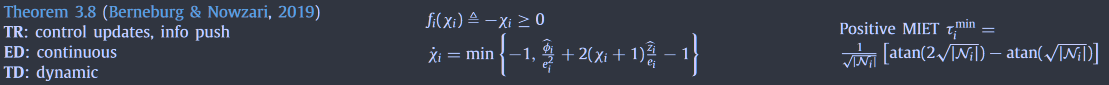